# **CS412 - Machine Learning - Fall 2023**
## **Homework 1**
100 pts


## **Goal**

*   Introduction to the machine learning experimental setup
*   Gain experience with the decision tree algortihm
*   Gain experience with the scikit-learn library
*   Learn to use appropriate prompts with AI tools



## **Dataset**
This dataset is taken from [Kaggle](https://www.kaggle.com/datasets/samybaladram/palmers-penguin-dataset-extended/data) and modified for Homework 1.


Columns:


**Species:** Species of the penguin (Adelie, Chinstrap, Gentoo)

**Island:** Island where the penguin was found (Biscoe, Dream, Torgensen)

**Sex:** Gender of the penguin (Male, Female)

**Diet:** Primary diet of the penguin (Fish, Krill, Squid)

**Year:** Year the data was collected (2021-2025)

**Life Stage:** The life stage of the penguin (Chick, Juvenile, Adult)

**Body Mass (g):** Body mass in grams

**Bill Length (mm):** Bill length in millimeters

**Bill Depth (mm):** Bill depth in millimeters

**Flipper Length (mm):** Flipper length in millimeters

**Health Metrics:** Health status of the penguin (Healthy, Overweight, Underweight)




❗ **Download the data from SuCourse.** It's named **cs412_hw1_dataset.csv**.
You must use 20% of the data for test and 80% for training:


 **Training: 80%,  Test: 20%**

## **Task**
Build a decision tree classifier with the scikit library function to predict Penguin health conditions - given in **Target column** health_metrics .

You will use ChatGPT **3.5** to write your code. For each part, send a prompt to ChatGPT for the task. You can use the initial prompt OR use additional prompts to correct / guide GPT. Copy the code generated by GPT to this notebook and run it here.

❗ **You will share your chat history, so use the same chat for ALL your prompts.**

## **Software: You may find the necessary function references here:**
http://scikit-learn.org/stable/supervised_learning.html

## **Submission:**
Once you have completed this notebook, Download it as .ipynb and name it Name-Surname-CS412-HW1.ipynb. (You can download by clicking on File - Download - Download .ipynb). Submit the ipynb to SuCourse.



## 0) Initialize

*   First make a copy of the notebook given to you as a starter.

*   Make sure you choose Connect form upper right.

*   You may upload the data to the section on your left on Colab, than right click on the .csv file and get the path of the file by clicking on "Copy Path". You will be using it when loading the data.


## 1) Import necessary libraries

In [1]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt


## 2) Load training dataset (5 pts)

*  Read the .csv file with the pandas library



In [2]:
file_path = 'cs412_hw1_dataset.csv'
df = pd.read_csv(file_path)


## 3) Understanding the dataset & Preprocessing (15 pts)

Understanding the Dataset: (5 pts)


> - Find the shape of the dataset (number of samples & number of attributes). (Hint: You can use the **shape** function)

> - Display variable names (both dependent and independent).


> - Display the summary of the dataset. (Hint: You can use the **info** function)


> - Display the first 5 rows from training dataset. (Hint: You can use the **head** function)




Preprocessing: (10 pts)


> - Check if there are any missing values in the dataset. If there are, you can either drop these values or fill it with most common values in corresponding rows. **Be careful that you have enough data for training the  model.**


> - Encode categorical labels with the mappings given in the cell below. (Hint: You can use **map** function)


In [3]:
num_samples, num_attributes = df.shape

print(f"Number of samples: {num_samples}")
print(f"Number of attributes: {num_attributes}")
print()

column_names = df.columns

print("Variable names:")
for name in column_names:
    print(name)
print()

print("Summary of the dataset:")
df.info()
print()

print("First 5 row:")
df.head()


missing_values = df.isna().sum()

print("Missing values in each column:")
print(missing_values)
print()

df.dropna(inplace=True)


Number of samples: 3430
Number of attributes: 11

Variable names:
species
island
bill_length_mm
bill_depth_mm
flipper_length_mm
body_mass_g
sex
diet
life_stage
health_metrics
year

Summary of the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3430 entries, 0 to 3429
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            3182 non-null   object 
 1   island             3388 non-null   object 
 2   bill_length_mm     3240 non-null   float64
 3   bill_depth_mm      3167 non-null   float64
 4   flipper_length_mm  3219 non-null   float64
 5   body_mass_g        3200 non-null   float64
 6   sex                3179 non-null   object 
 7   diet               3163 non-null   object 
 8   life_stage         3361 non-null   object 
 9   health_metrics     3430 non-null   object 
 10  year               3387 non-null   float64
dtypes: float64(5), object(6)
memory usage: 294.9+ KB

First 5 r

In [4]:
sex_map = {'female':1, 'male': 0}

island_map = {'Biscoe': 1,
              'Dream': 2,
              'Torgensen': 3}

diet_map = {'fish': 1,
              'krill': 2,
              'squid': 3,
            "parental":4}

life_stage_map = {'chick': 1,
              'juvenile': 2,
              'adult': 3}

health_metrics_map = {'healthy': 1,
              'overweight': 2,
              'underweight': 3}


df['sex'] = df['sex'].map(sex_map)
df['island'] = df['island'].map(island_map)
df['diet'] = df['diet'].map(diet_map)
df['life_stage'] = df['life_stage'].map(life_stage_map)
df['health_metrics'] = df['health_metrics'].map(health_metrics_map)

df = pd.get_dummies(df, columns=['species'], drop_first=True)


## 4) Set X & y, split data (5 pts)

*   Shuffle the dataset.
*   Seperate your dependent variable X, and your independent variable y. The column health_metrics is y, the rest is X.
*   Split training and test sets as 80% and 20%, respectively.





In [5]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split


df_shuffled = shuffle(df, random_state=42)


X = df_shuffled.drop('health_metrics', axis=1)
y = df_shuffled['health_metrics']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## 4.1) Features and Correlations (10 pts)

* Correlations of features with health (4 points)
Calculate the correlations for all features in dataset. Highlight any strong correlations with the target variable. Plot your results in a heatmap.

* Feature Selection (3 points)
Select a subset of features that are likely strong predictors, justifying your choices based on the computed correlations.

* Hypothetical Driver Features (3 points)
Propose two hypothetical features that could enhance the model's predictive accuracy for Y, explaining how they might be derived and their expected impact. Show the resulting correlations with target variable.

* __Note:__ You get can get help from GPT.


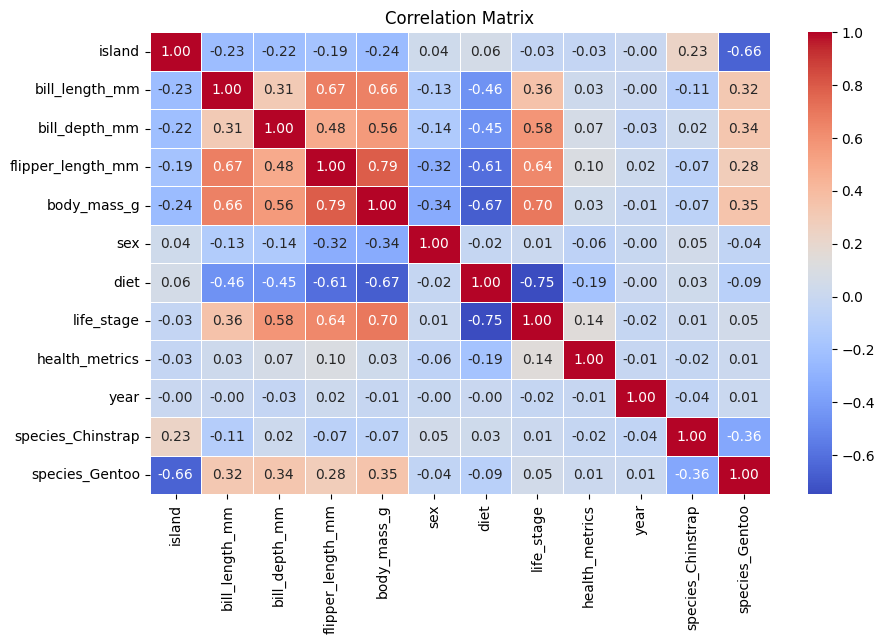

In [6]:
correlations = df.corrwith(df['health_metrics'], numeric_only=True)

correlation_df = pd.DataFrame({'Feature': correlations.index, 'Correlation': correlations.values})


plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


In [7]:
correlation_threshold = 0.1

# Selecting features with correlation coefficients above the threshold, excluding the target variable
selected_features = correlation_df[(abs(correlation_df['Correlation']) > correlation_threshold) & (correlation_df['Feature'] != 'health_metrics')]['Feature']

# Display selected features
print("Selected Features:")
print(selected_features)

# Create a DataFrame with the selected features and the target variable
selected_df = df[selected_features.tolist() + ['health_metrics']]

print("\nSelected DataFrame:")
print(selected_df.head())


Selected Features:
3    flipper_length_mm
6                 diet
7           life_stage
Name: Feature, dtype: object

Selected DataFrame:
    flipper_length_mm  diet  life_stage  health_metrics
4               177.0     1           2               2
6               211.0     1           3               2
8               270.0     1           3               2
9               230.0     1           3               2
10              277.0     1           3               2


### Hypothetical Driver Features: "Body Mass Index (BMI)" and "Bill Shape (length and depth ratio)".
BMI can be derieved from height and weight values and Bill Shape can be derieved from bill_length and bill_depth values.

BMI could be used as a prime indicator for the health of the penguings and bill shape can indicate certain health conditions. These hypothetical features can give us more information about their health.
So it can be said that they are correlated with the health_metrics when 'BMI' and 'Bill Shape' values is further away from the optimal value and health values will definitely effected.

----

## 5) Tune Hyperparameters (20 pts)


* Choose 2 hyperparameters to tune. You can use the [Scikit learn decision tree documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) for the available hyperparameters *(Hyperparameters are listed under "Parameters" in the documentation)*. Use GridSearchCV for hyperparameter tuning, with a cross-validation value of 5. Use validation accuracy to pick the best hyper-parameter values. (15 pts)
-Explain the hyperparameters you chose to tune. *(What are the hyperparameters you chose? Why did you choose them?)* (5 pts)



In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV


dt_classifier = DecisionTreeClassifier(random_state=42)

param_grid = {
    'max_depth': [5, 8, 12, 16],
    'min_samples_split': [4, 8, 14, 20]
}


grid_search = GridSearchCV(dt_classifier, param_grid, scoring='f1_macro', cv=5)

grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [5, 8, 12, 16],
                         'min_samples_split': [4, 8, 14, 20]},
             scoring='f1_macro')

I chose hypermeters max_depth and min_samples_split because:

max_depth: controls the maximum depth of the decision tree. A deeper tree can model more complex relationships in the data.

min_samples_split: sets the minimum number of samples required to split an internal node. It helps control the detail level of the splits in the decision tree.

## 6) Re-train and plot the decision tree with the hyperparameters you have chosen (15 pts)

- Re-train model with the hyperparameters you have chosen in part 5). (10 pts)
- Plot the tree you have trained. (5 pts)

Hint: You can import the **plot_tree** function from the sklearn library.





In [9]:
best_max_depth = grid_search.best_params_['max_depth']
best_min_samples_split = grid_search.best_params_['min_samples_split']

best_dt_classifier = DecisionTreeClassifier(
    max_depth=best_max_depth,
    min_samples_split=best_min_samples_split,
    random_state=42
)


best_dt_classifier.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=16, min_samples_split=4, random_state=42)

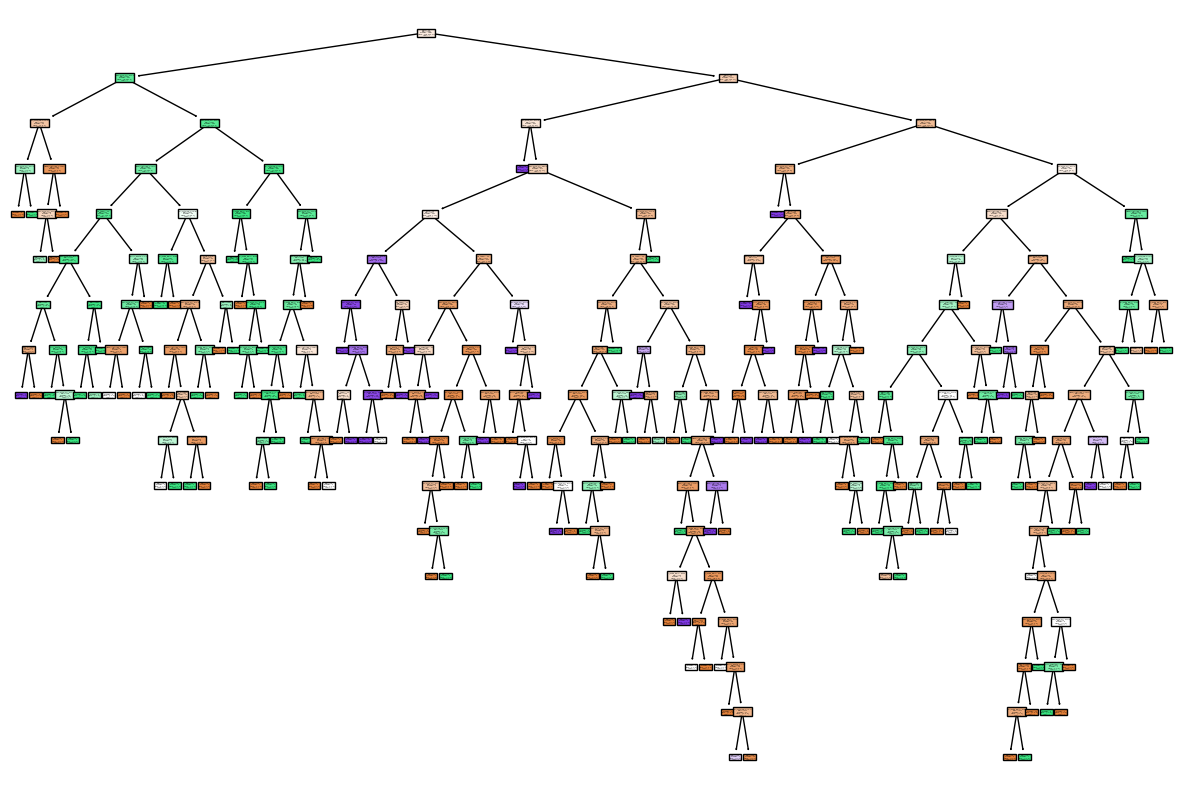

In [10]:
from sklearn.tree import plot_tree

class_names = [str(cls) for cls in best_dt_classifier.classes_]

plt.figure(figsize=(15, 10))
plot_tree(best_dt_classifier, filled=True, feature_names=X_train.columns, class_names=class_names)
plt.show()



## 7) Test your classifier on the test set (20 pts)

- Predict the labels of testing data using the tree you have trained in step 6. (10 pts)
- Report the classification accuracy. (2 pts)
- Plot & investigate the confusion matrix. Fill the following blanks. (8 pts)
> The model most frequently mistakes class(es) ___0(healthy)___ for class(es) ___1(overweight)___.

Hint: You can use the confusion_matrix function from sklearn.metrics



In [11]:
from sklearn.metrics import accuracy_score

y_pred = best_dt_classifier.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print("Classification Accuracy:", accuracy)

Classification Accuracy: 0.871536523929471


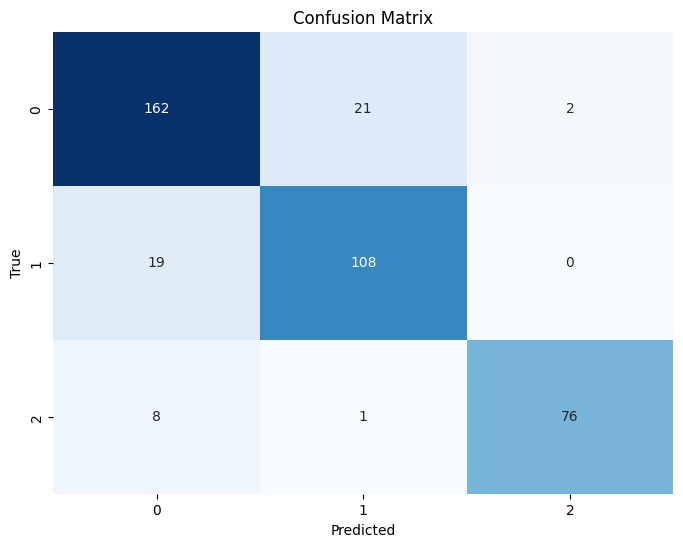

In [12]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

conf_matrix = confusion_matrix(y_test, y_pred)


plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


**Fill the blanks:** The model most frequently mistakes class(es) ___0(healthy)___ for class(es) ___1(overweight)___.

## 8) Find the information gain on the first split (10 pts)

- Find the information gain on the first split with **Entropy** according to the formula from the lecture notes (given below)
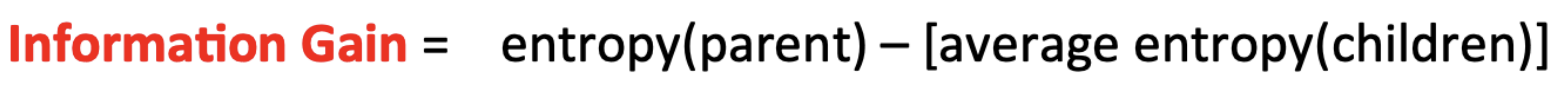



In [13]:
import numpy as np

def entropy(labels):
    unique_labels, counts = np.unique(labels, return_counts=True)
    probabilities = counts / len(labels)
    return -np.sum(probabilities * np.log2(probabilities))


labels_parent = df['health_metrics']

flipper_threshold = 230.0

labels_child1 = df[df['flipper_length_mm'] <= flipper_threshold]['health_metrics']
labels_child2 = df[df['flipper_length_mm'] > flipper_threshold]['health_metrics']

entropy_parent = entropy(labels_parent)

entropy_child1 = entropy(labels_child1)
entropy_child2 = entropy(labels_child2)


num_samples_parent = len(labels_parent)
num_samples_child1 = len(labels_child1)
num_samples_child2 = len(labels_child2)

average_entropy_children = (
    (num_samples_child1 / num_samples_parent) * entropy_child1 +
    (num_samples_child2 / num_samples_parent) * entropy_child2
)

information_gain = entropy_parent - average_entropy_children

print("information gain: ", information_gain)


information gain:  0.1032580288850582



## 9) GPT 3.5 Chat History

Submit the link for your chat history.



*   When you are in the chat, click on the "Share Chat" button on the top right (Shown Below).

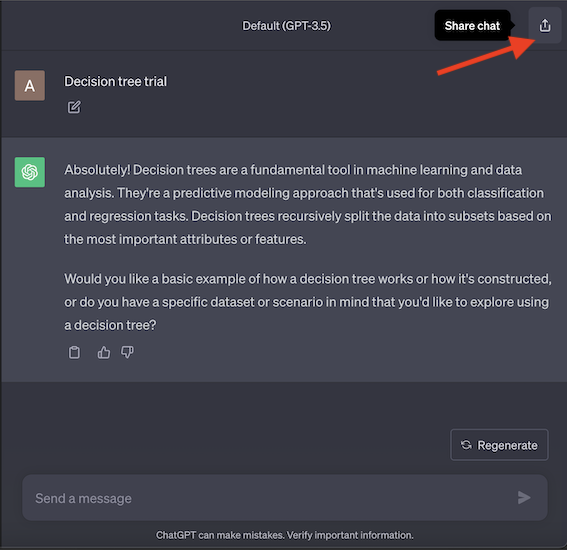

- On the screen that opens up, name the chat Name-Surname-CS412-HW1 (Shown Below).

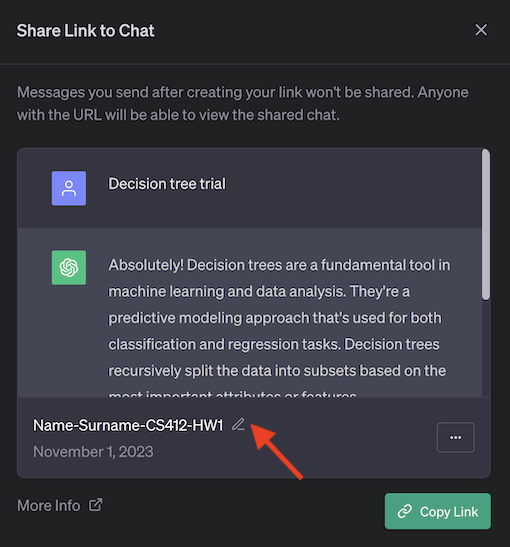

- Set sharing to "Share your name" (Shown Below).

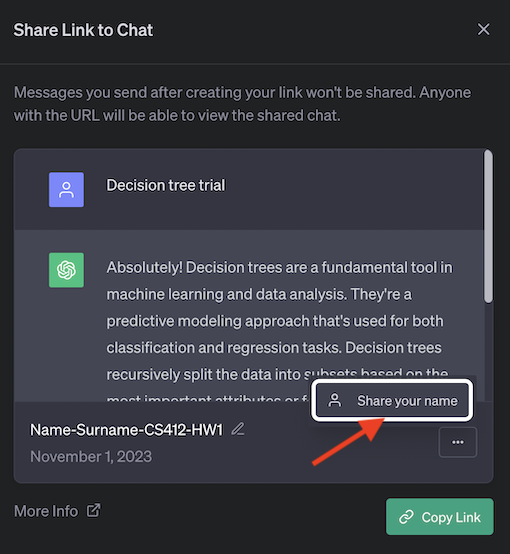

- Copy link and paste to the text cell below (Shown Below).

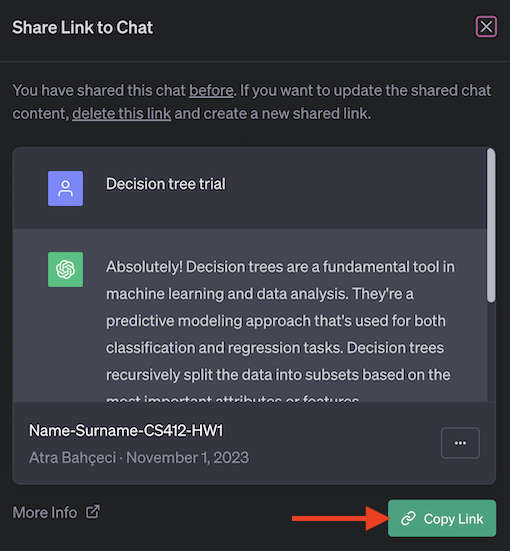

**Link to Chat:** https://chat.openai.com/share/941a3ef2-7559-430c-8682-830a04a6864c